<a href="https://colab.research.google.com/github/DabhadeAnjali/dlproject/blob/main/DLProject1BreastCancerClassificationwithANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Classification with Neural Network**

Importing Libraries


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Collection & Processing

In [12]:
# loading the data to a data frame
data_frame = pd.read_csv('/content/breastCancer.csv')

In [13]:
# print the first 5 rows of the dataframe
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data_frame.shape

(569, 32)

In [15]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
# checking for missing values
data_frame.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [17]:
# statistical measures about the data
data_frame.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
data_frame.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [23]:
#Label Encoding
data_frame['diagnosis'].replace(['M', 'B'],
                        [0, 1], inplace=True)

Separating the features and target

In [28]:
X = data_frame.drop(['diagnosis','id'],axis=1)
y = data_frame['diagnosis']

In [29]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [25]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


Splitting the data into training data & Testing data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [40]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


Building the Neural Network

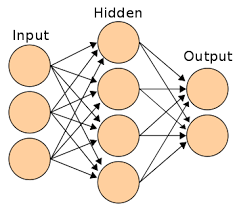

In [41]:
# importing tensorflow and Keras
import tensorflow as tf
# tf.random.set_seed(3)
# from tensorflow import keras

In [45]:
# initializing the ANN
ann =tf.keras.models.Sequential()

In [46]:
#adding 1st hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [47]:
#adding 2nd hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [48]:
#adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [49]:
# compiling the Neural Network
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3)

In [59]:
# training the Meural Network
history = ann.fit(X_train_std,y_train,batch_size=32,validation_split=0.1,epochs=50,callbacks=[early_stopping])

Epoch 1/50
13/13 [==============================] - 0s 29ms/step - loss: 0.0382 - accuracy: 0.9927 - val_loss: 0.0467 - val_accuracy: 0.9565
Epoch 2/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.9927 - val_loss: 0.0461 - val_accuracy: 0.9565
Epoch 3/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.9927 - val_loss: 0.0456 - val_accuracy: 0.9565
Epoch 4/50
13/13 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.9927 - val_loss: 0.0461 - val_accuracy: 0.9565
Epoch 5/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0369 - accuracy: 0.9927 - val_loss: 0.0449 - val_accuracy: 0.9565
Epoch 6/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0364 - accuracy: 0.9927 - val_loss: 0.0448 - val_accuracy: 0.9565
Epoch 7/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.9927 - val_loss: 0.0448 - val_accuracy: 0.9565
Epoch 8/50
13

Visualizing accuracy and loss

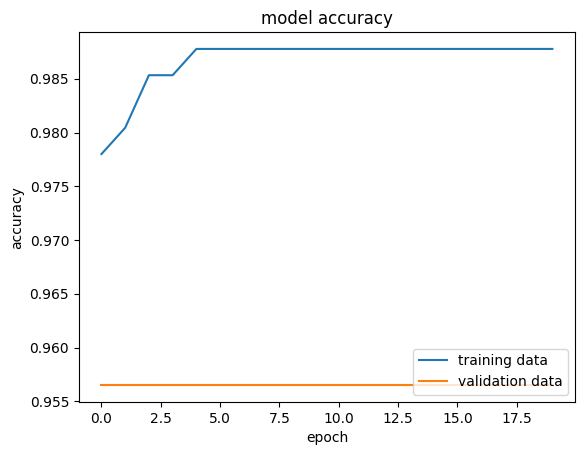

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

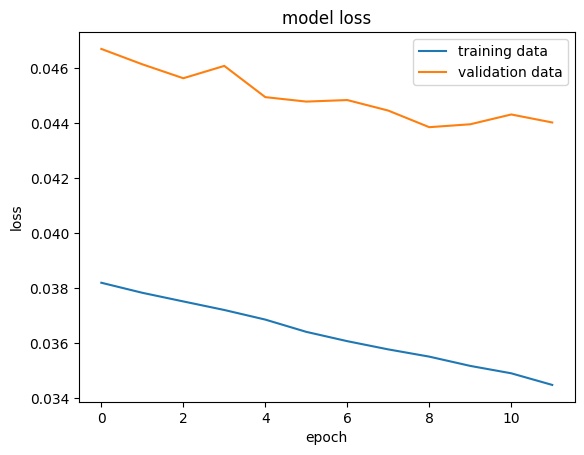

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [61]:
loss, accuracy = ann.evaluate(X_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1093 - accuracy: 0.9561
0.9561403393745422


In [62]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [63]:
y_pred = ann.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [64]:
print(y_pred.shape)
print(y_pred[0])

(114, 1)
[0.973649]


model.predict() gives the prediction probability of each class for that data point

In [70]:
# converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Building the predictive system**

In [74]:
# input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

input_data = (12.3	,15.9,	78.83,463.7,0.0808,0.07253,0.03844,0.01654	,0.1667	,0.05474,	0.2382,	0.8355,	1.687,	18.32,	0.005996,	0.02212,	0.02117,	0.006433,	0.02025,	0.001725,	13.35,	19.59,	86.65,	546.7,	0.1096,	0.165	,0.1423,	0.04815,	0.2482,	0.06306)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = ann.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 23ms/step
[[0.9995679]]
[0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[42  3]
 [ 2 67]]


0.956140350877193

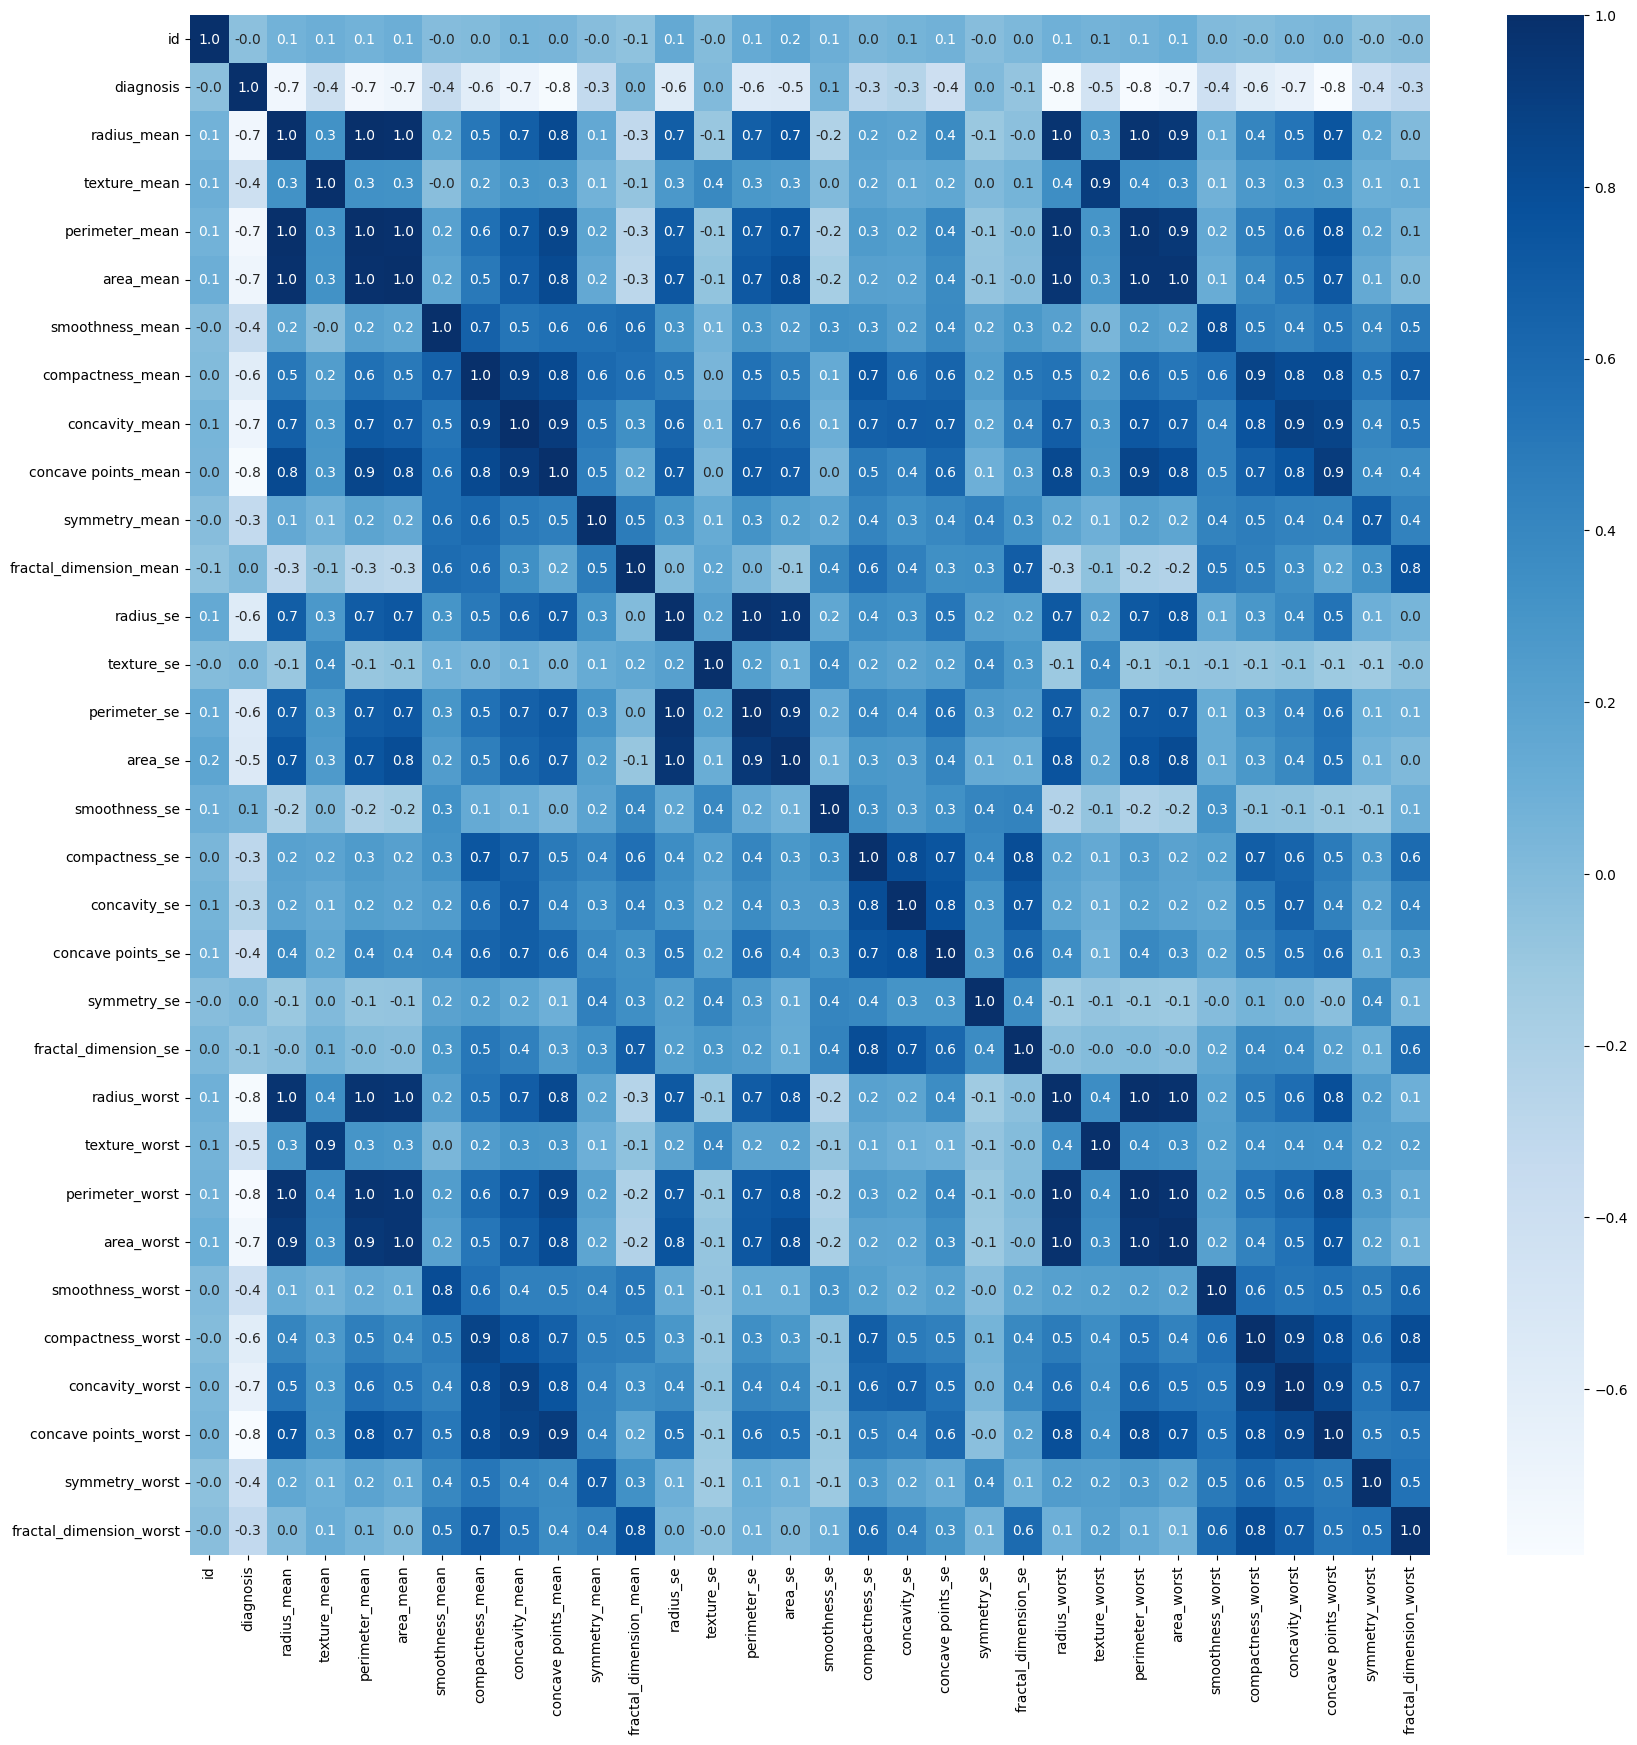

In [75]:
import seaborn as sns
correlation_matrix = data_frame.corr()
# constructing a heat map to visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

Outliers Detection

In [76]:
import matplotlib.pyplot as plt

<ipython-input-77-728e59117bab>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


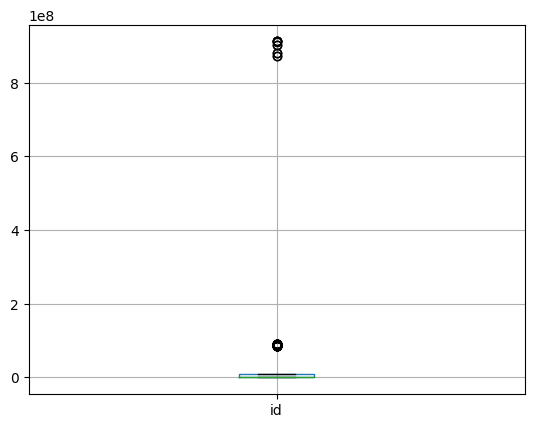

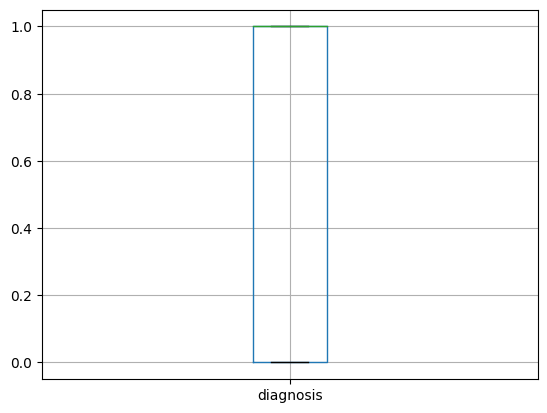

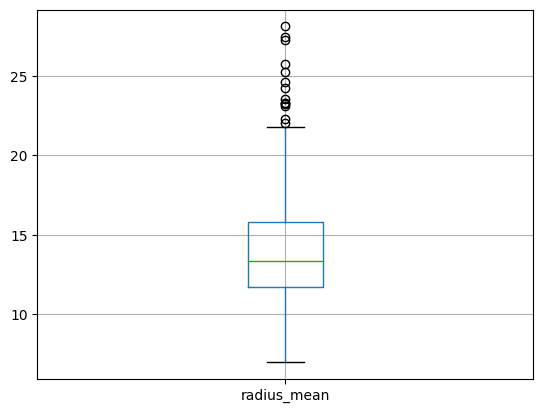

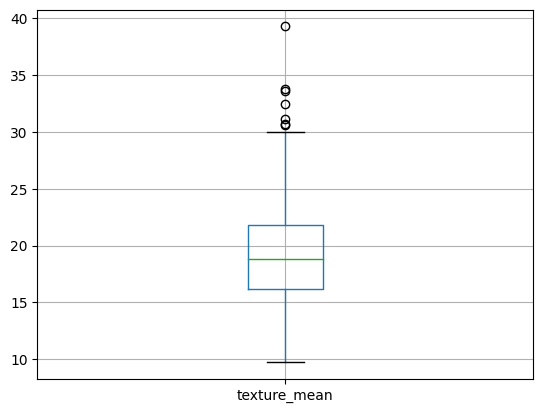

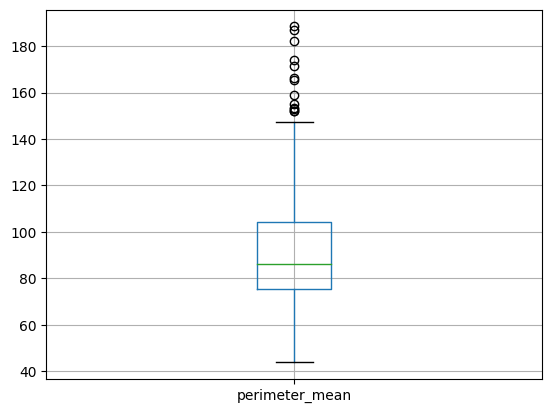

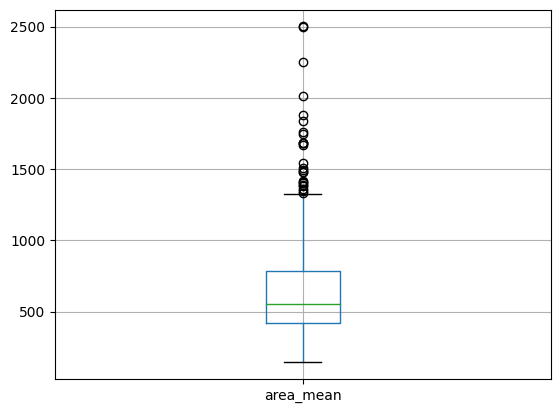

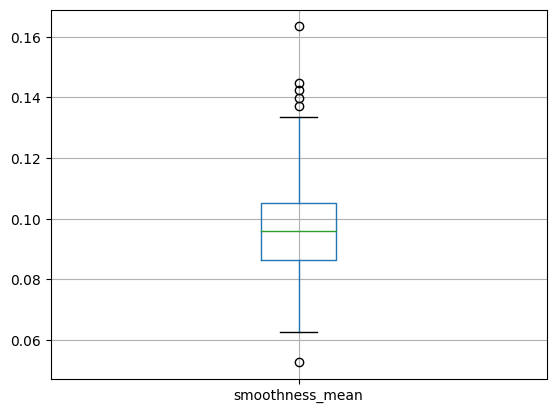

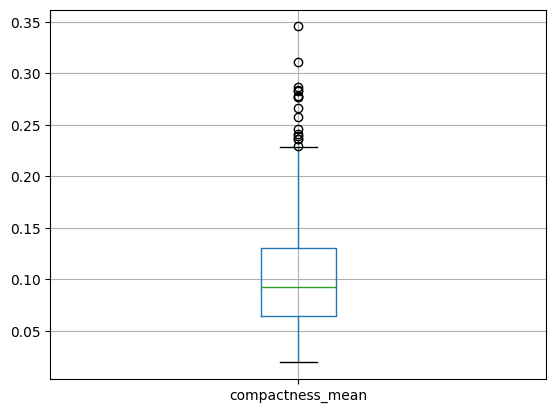

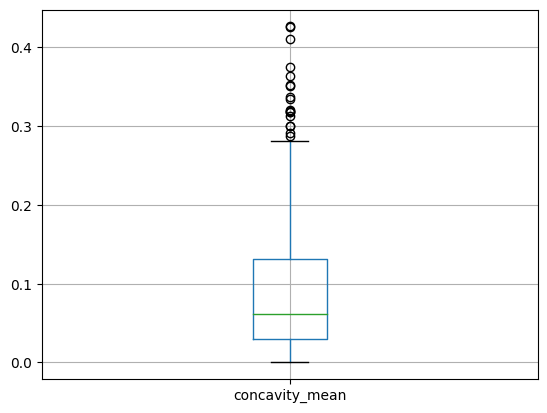

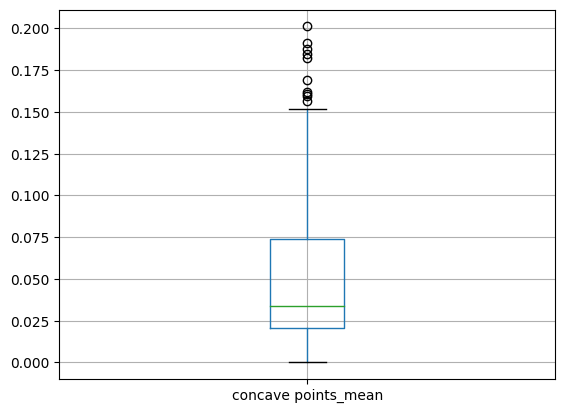

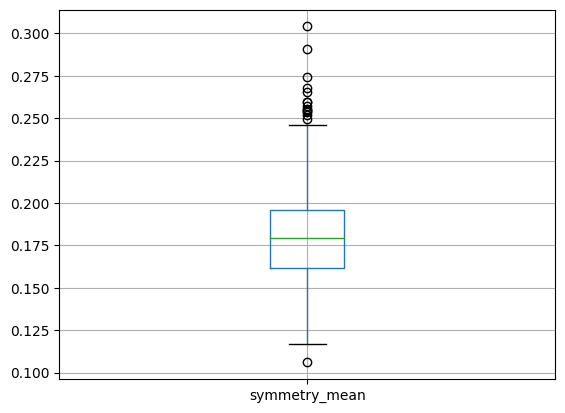

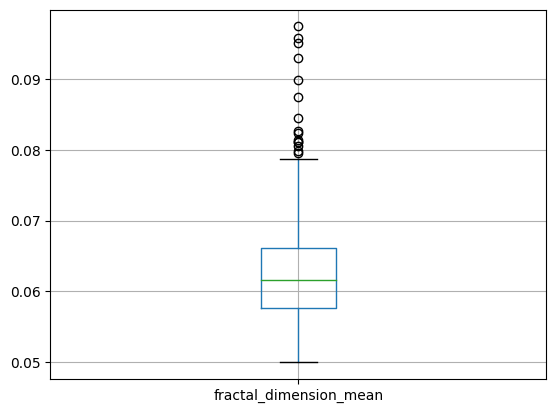

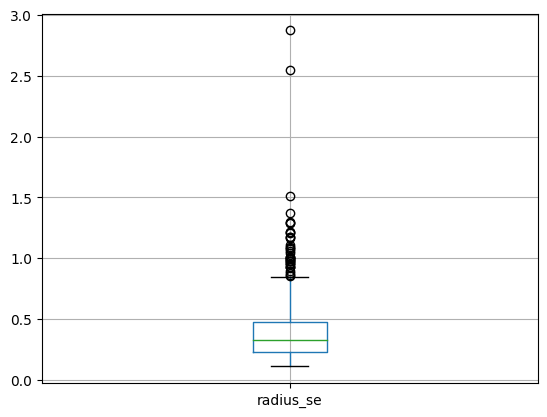

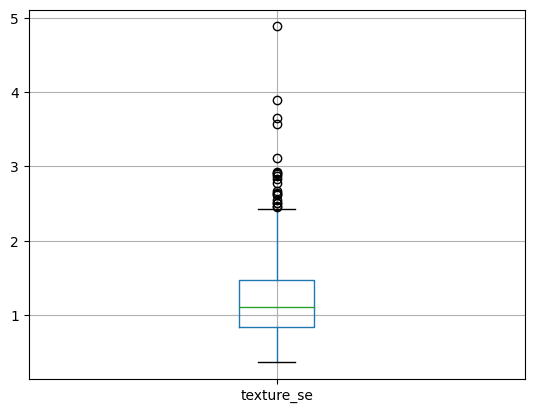

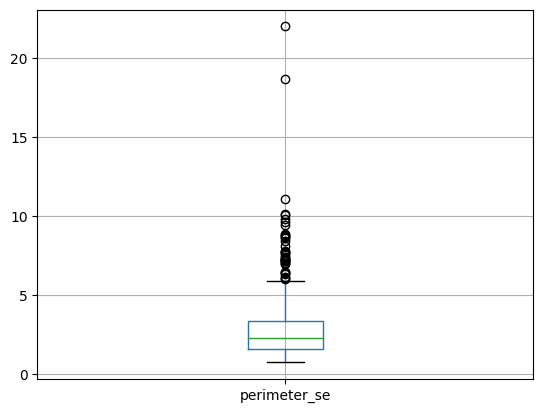

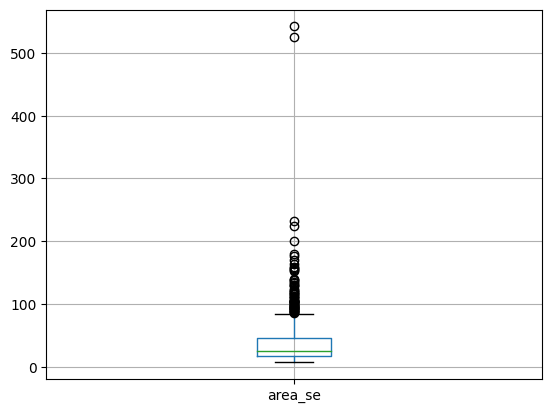

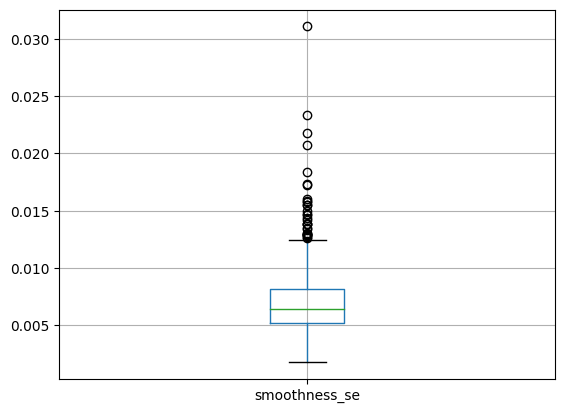

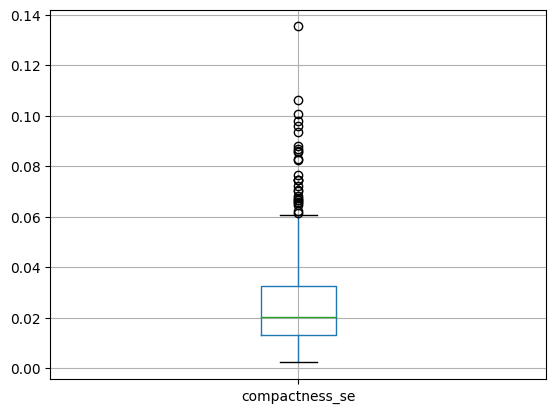

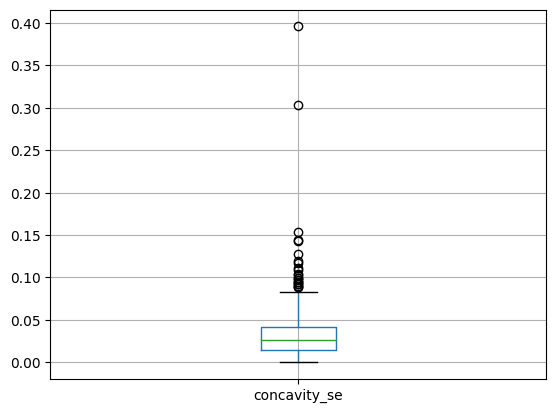

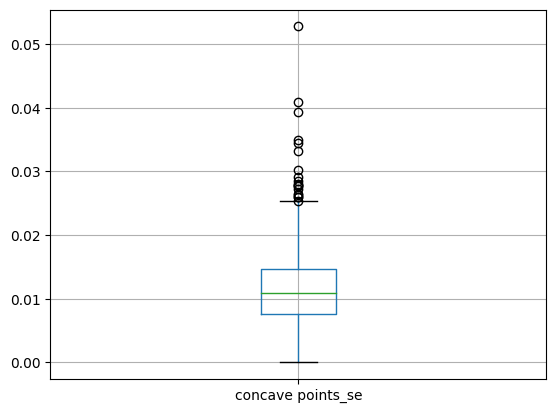

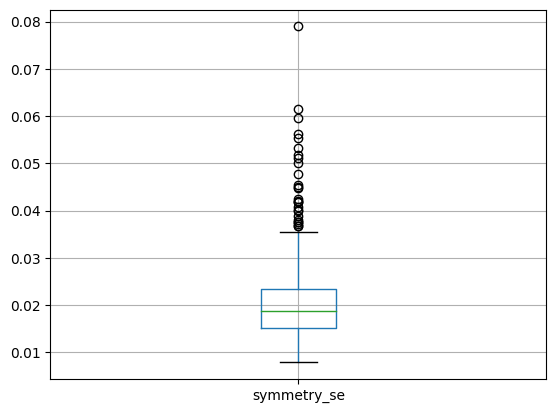

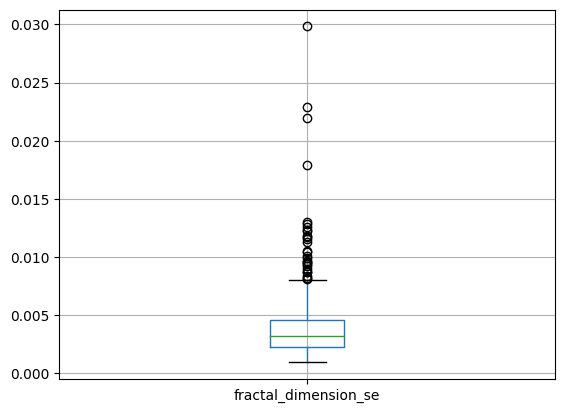

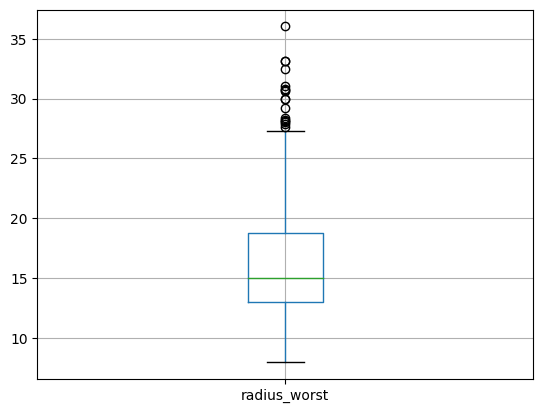

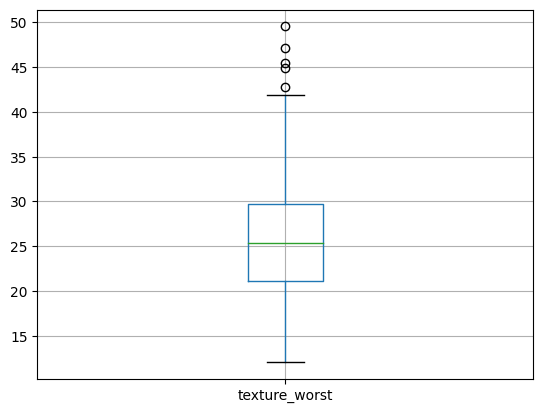

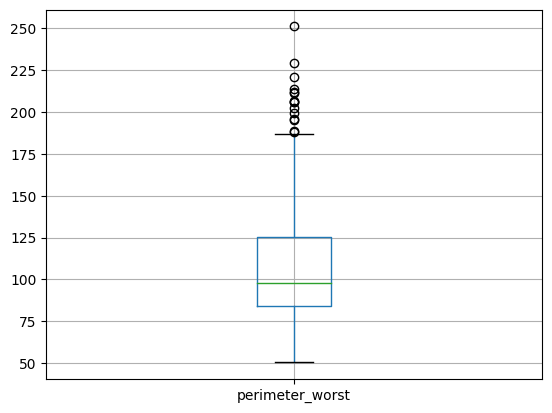

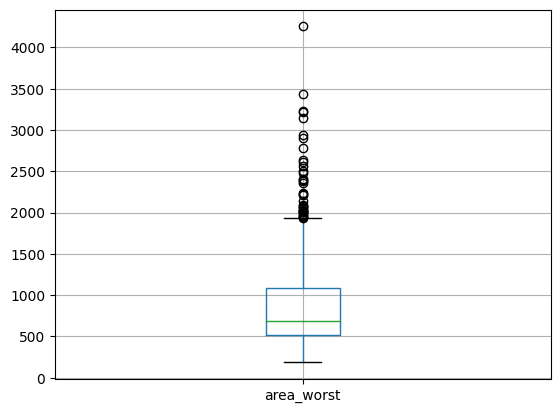

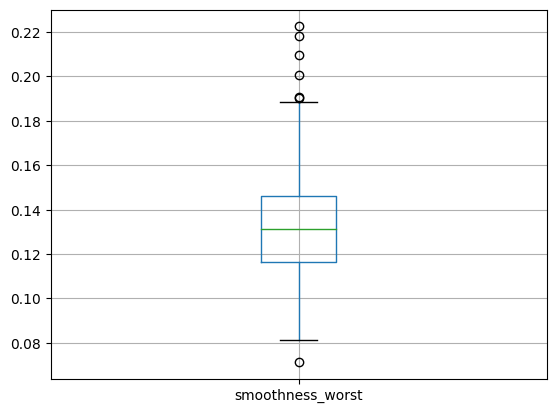

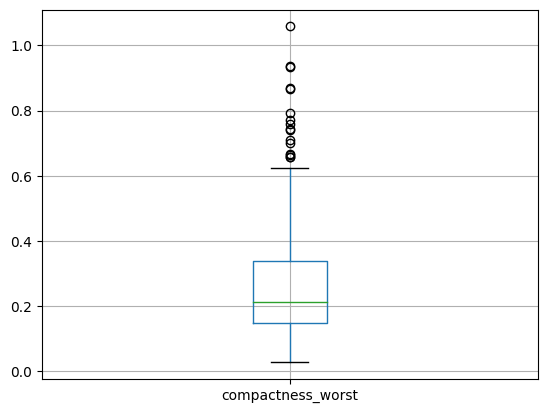

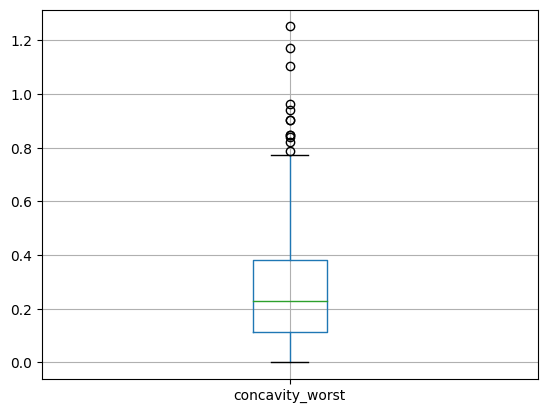

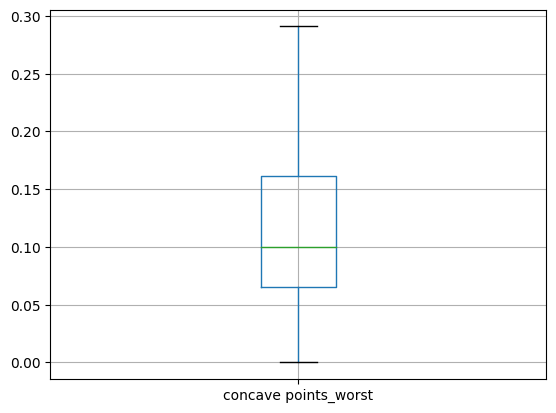

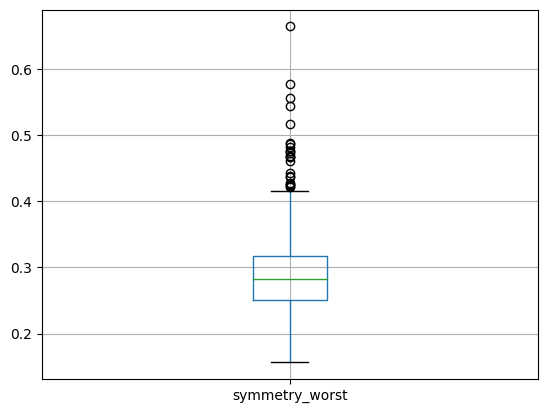

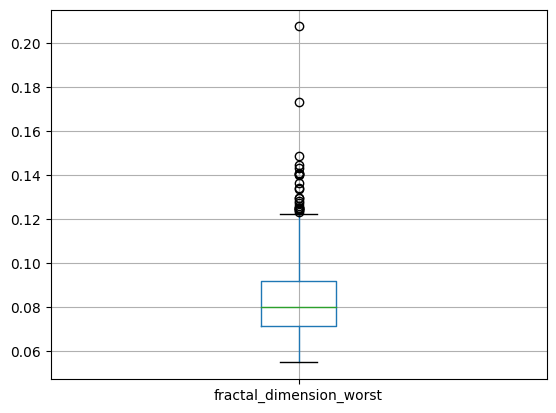

In [77]:
for column in data_frame:
    plt.figure()
    data_frame.boxplot([column])

<Axes: xlabel='diagnosis', ylabel='count'>

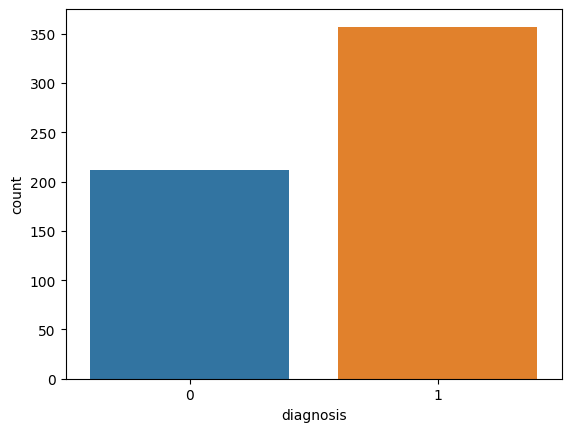

In [79]:
sns.countplot(x=y, data=data_frame)

Distribution plotfor all Columns

In [82]:
for column in data_frame:
  print(column)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


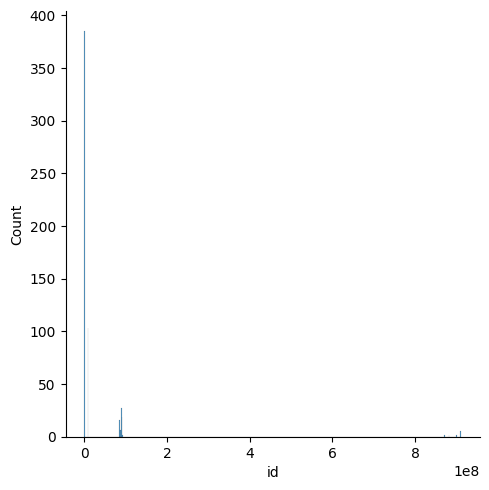

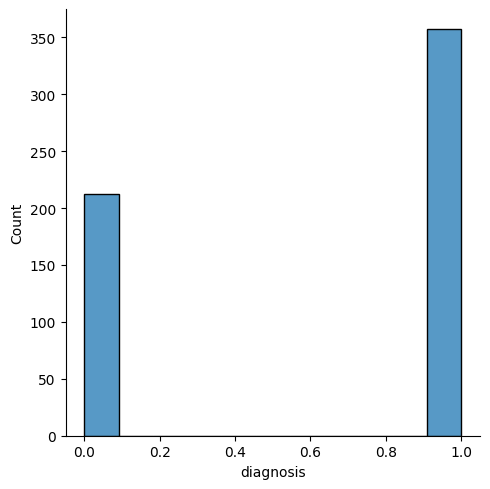

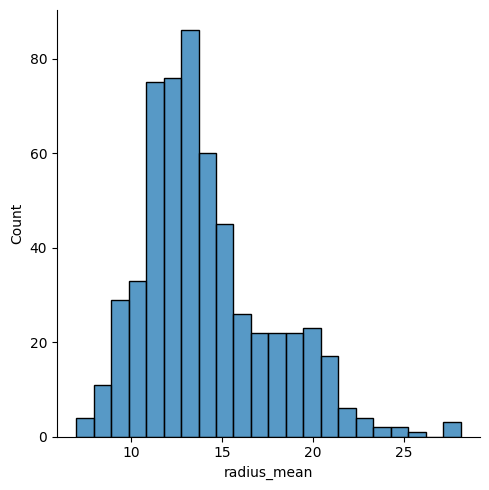

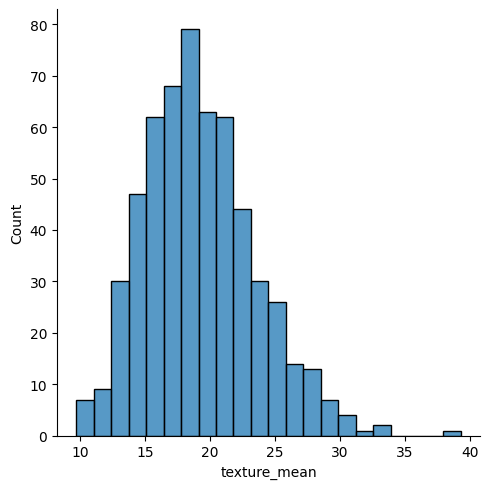

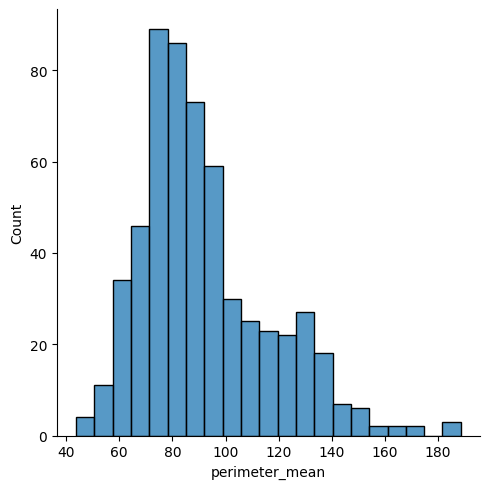

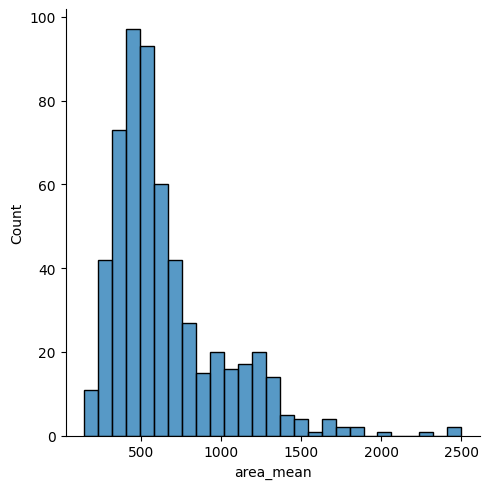

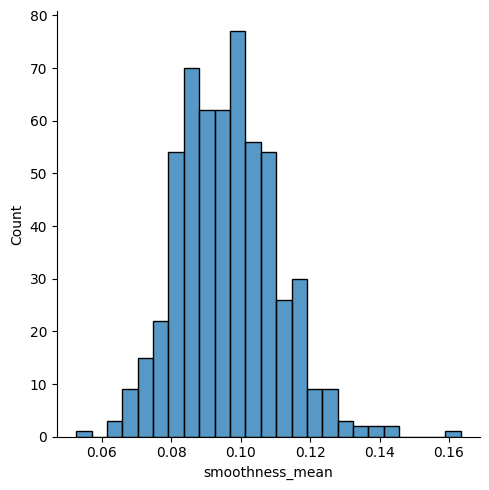

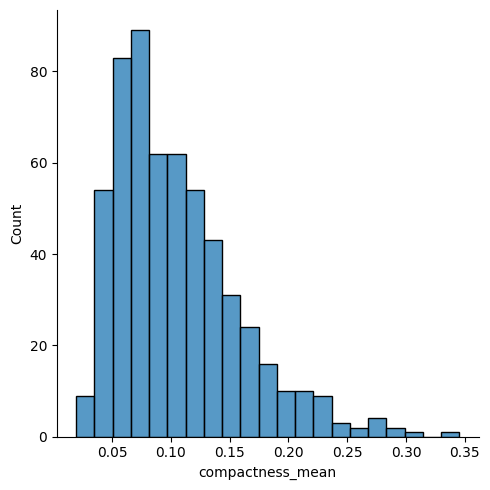

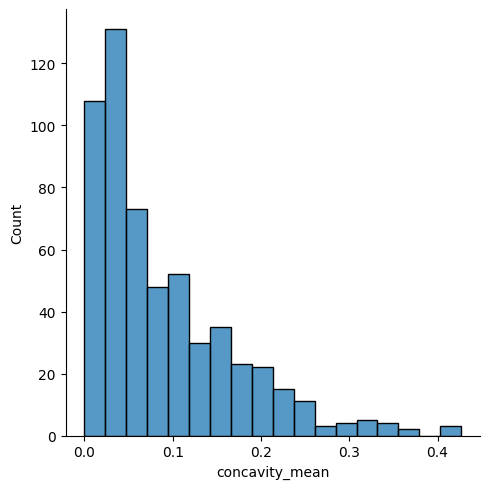

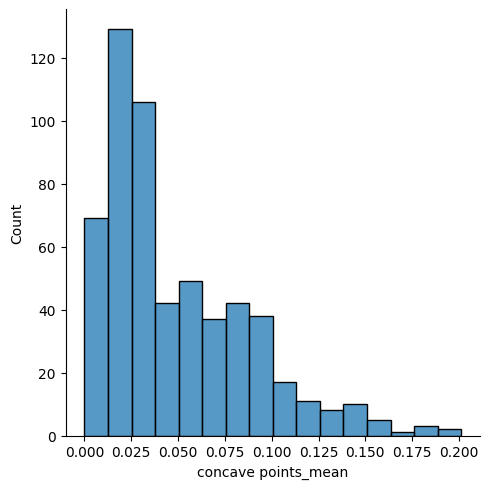

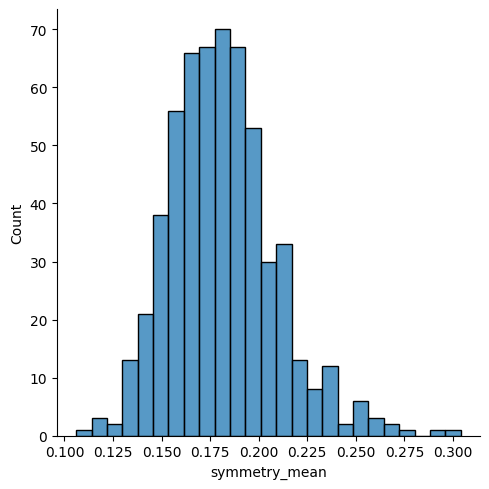

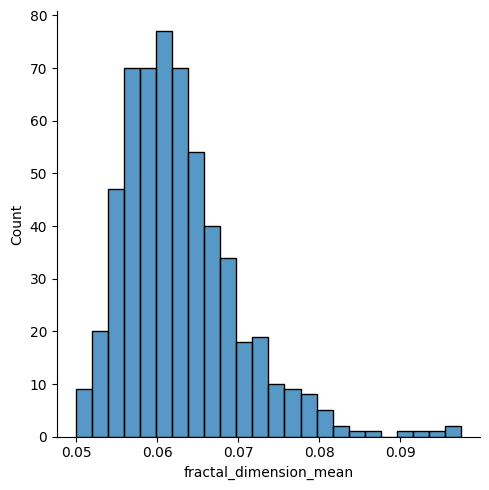

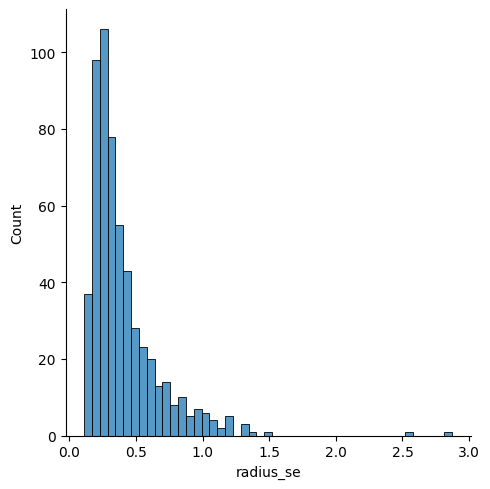

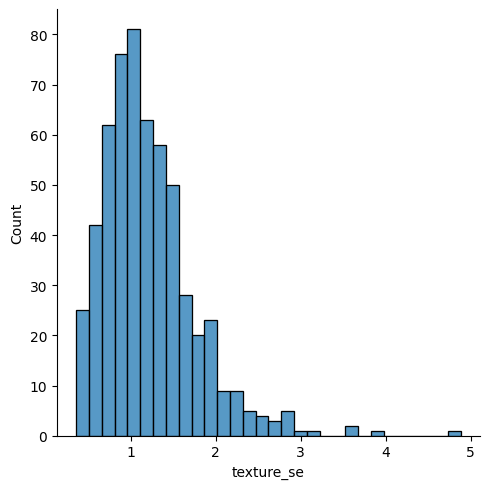

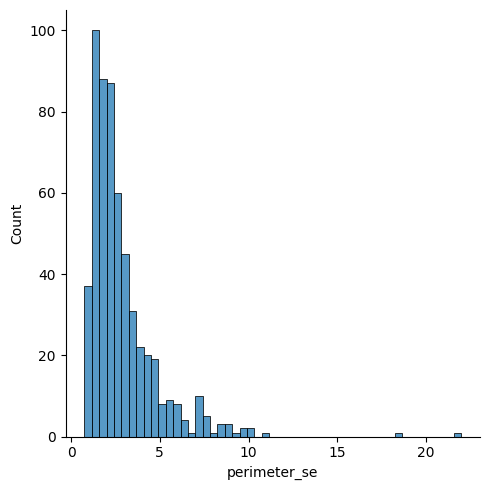

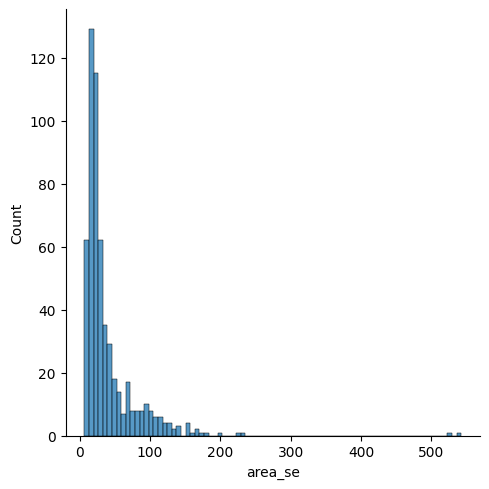

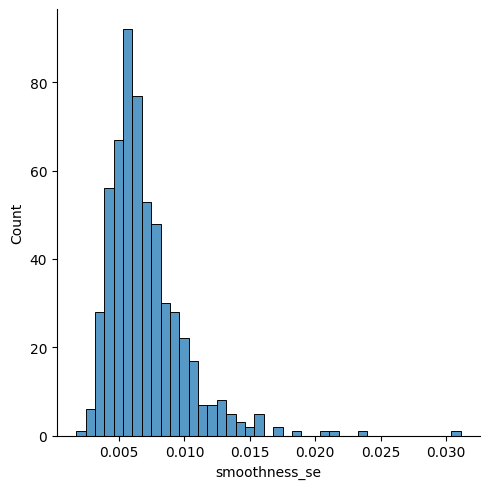

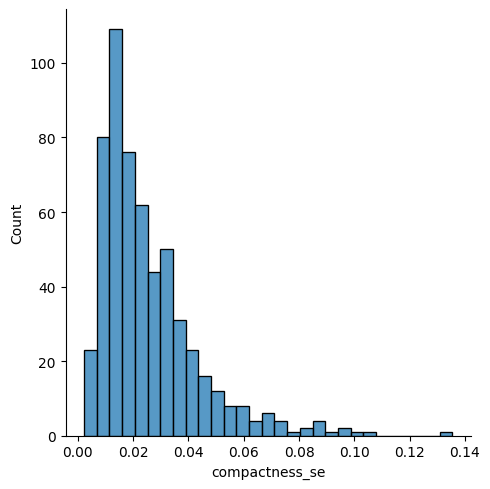

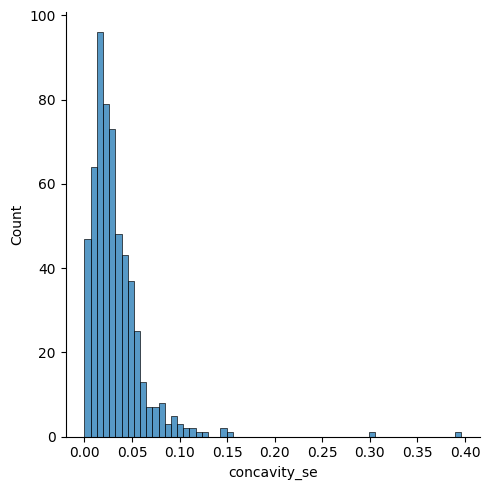

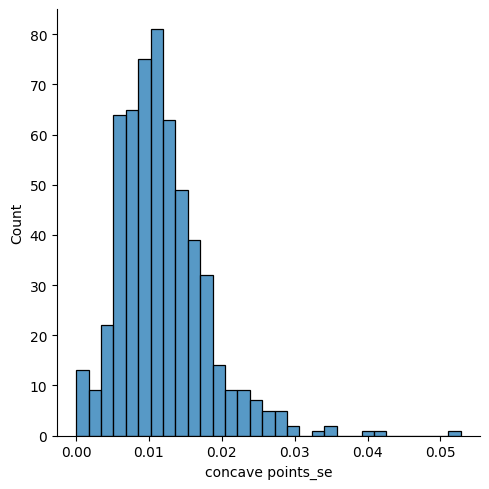

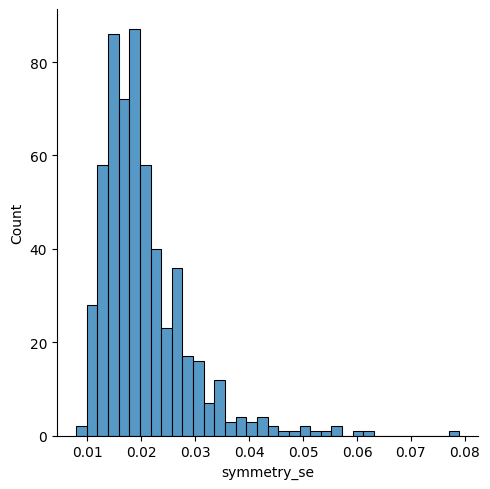

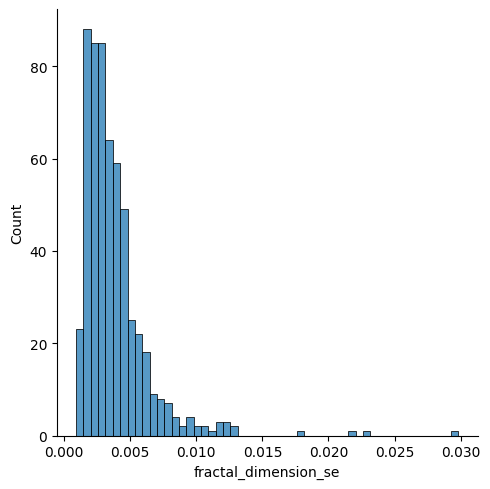

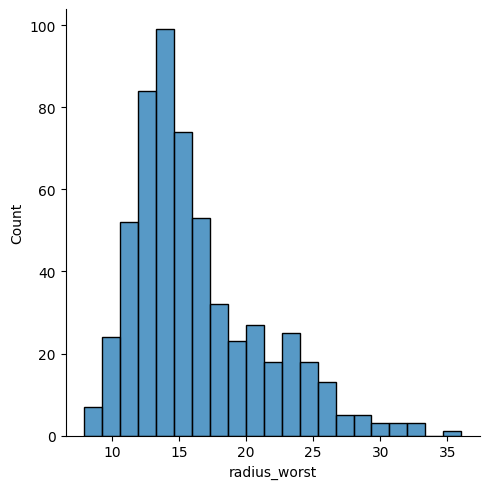

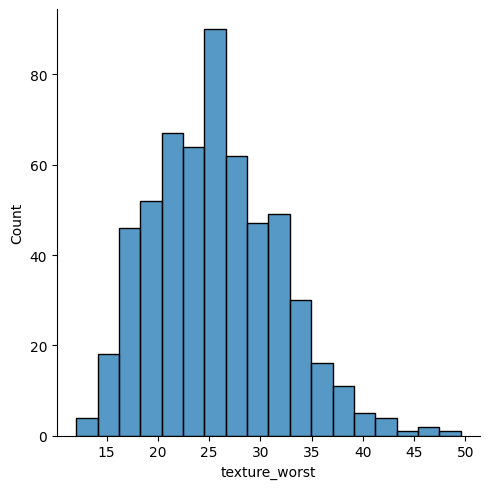

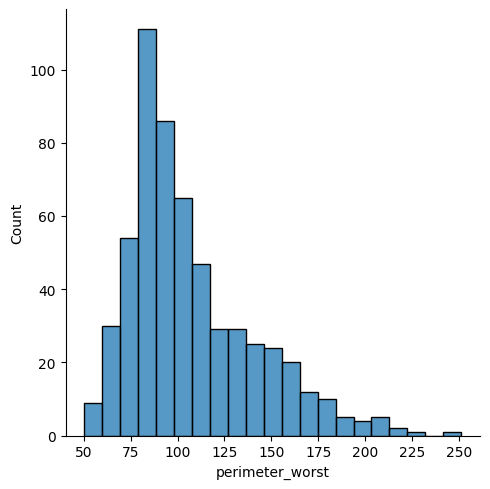

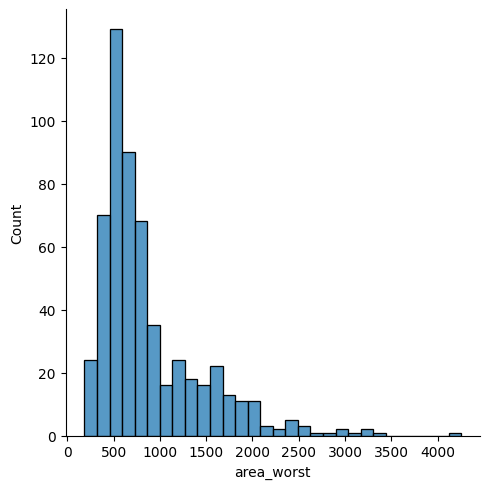

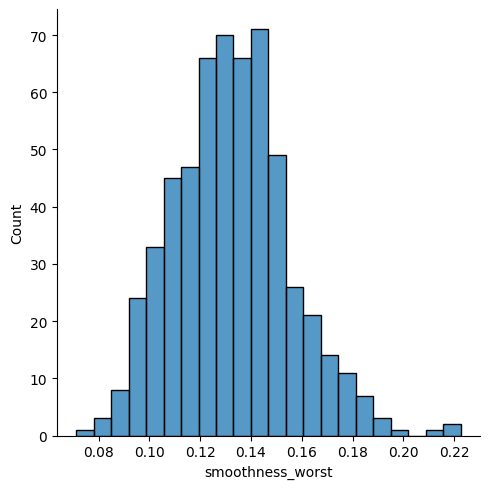

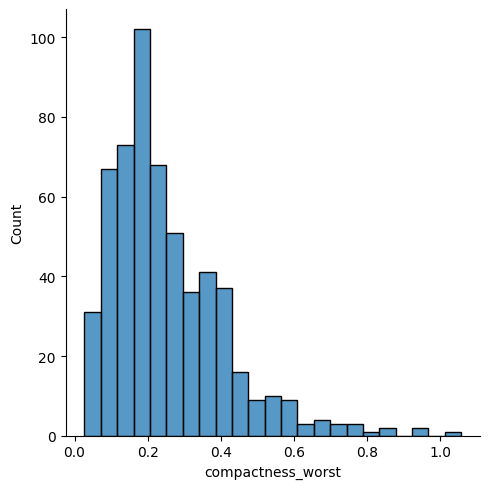

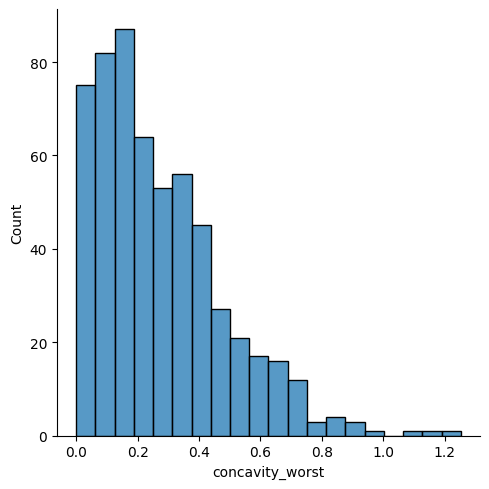

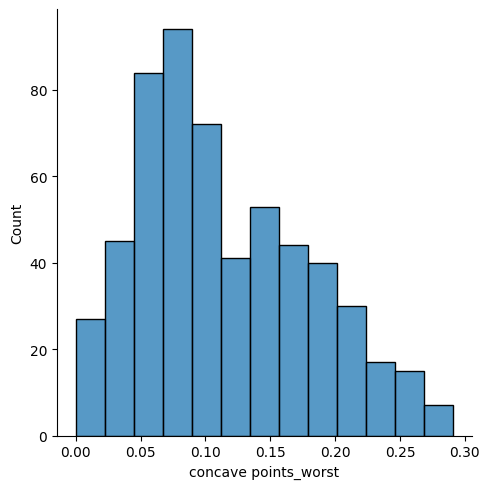

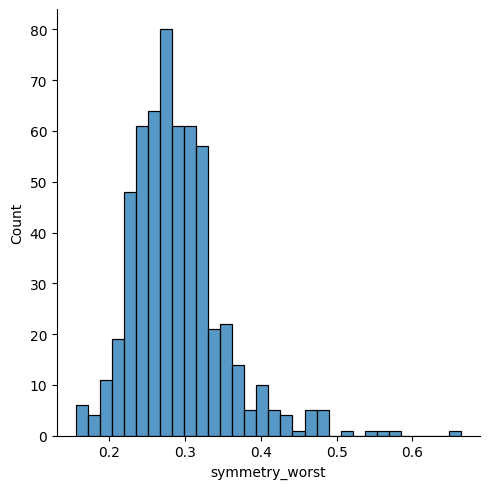

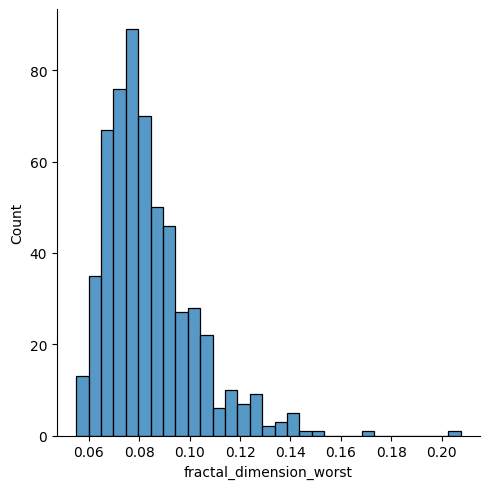

In [80]:
for column in data_frame:
  sns.displot(x=column, data=data_frame)